<a href="https://colab.research.google.com/github/engSalah-dot/Machine-Learning-from-scratch-to-advanced/blob/main/Dogs%20and%20Cats%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs and Cats Image Classification (Without Augmentation)**

> Add blockquote



In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from PIL import Image

In [2]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filterted.zip',origin=_URL,extract=True)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filterted_extracted
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation/dogs


In [4]:
base_dir=os.path.join(zip_dir,'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')


In [5]:
num_train_cats=len(os.listdir(train_cats_dir))
num_train_dogs=len(os.listdir(train_dogs_dir))
num_val_cats=len(os.listdir(validation_cats_dir))
num_val_dogs=len(os.listdir(validation_dogs_dir))
train_num=num_train_cats+num_train_cats
val_num=num_val_cats+num_val_dogs
total_num=train_num+val_num
print(f' number of cats training datasets {num_train_cats} \n number of dogs training datasets {num_train_dogs}  ')
print(f' the number of training datasets {train_num} \n the number of validation datasets {val_num} \n the total number of datasets {total_num}')

 number of cats training datasets 1000 
 number of dogs training datasets 1000  
 the number of training datasets 2000 
 the number of validation datasets 1000 
 the total number of datasets 3000


In [6]:
Batch_size=100
image_resize=150
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)


In [7]:
train_dat_gen=train_image_generator.flow_from_directory(batch_size=Batch_size,directory=train_dir,shuffle=True,target_size=(image_resize,image_resize),class_mode='binary')
val_dat_gen=validation_image_generator.flow_from_directory(batch_size=Batch_size,directory=validation_dir,shuffle=True,target_size=(image_resize,image_resize),class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
sample_training_images, _ = next(train_dat_gen)
sample_training_images.shape


(100, 150, 150, 3)

In [9]:
def plot_image(image_arr):
  fig,axe=plt.subplots(1,5,figsize=(20,20))
  axe=axe.flatten()
  for img,ax in zip(image_arr,axe):

    ax.imshow(img)
  plt.tight_layout()
  plt.show()


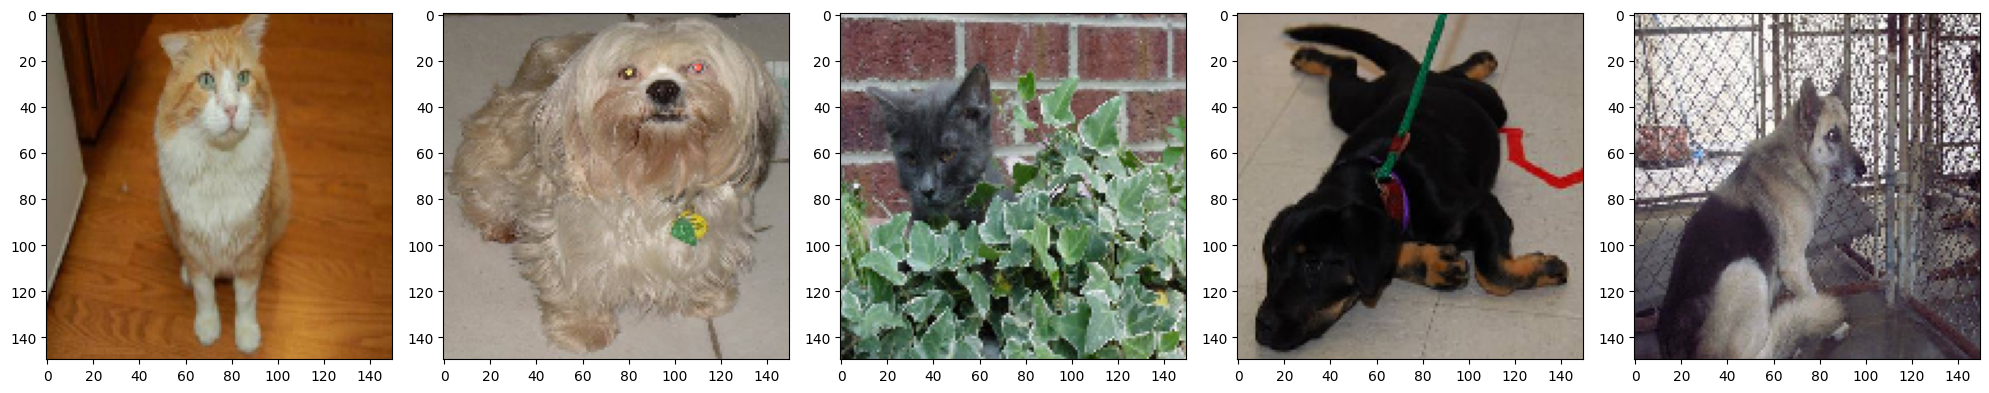

In [10]:
plot_image(sample_training_images[:5])  # Plot images 0-4

# ***Dogs Vs Cats With Augmentation***

Found 2000 images belonging to 2 classes.


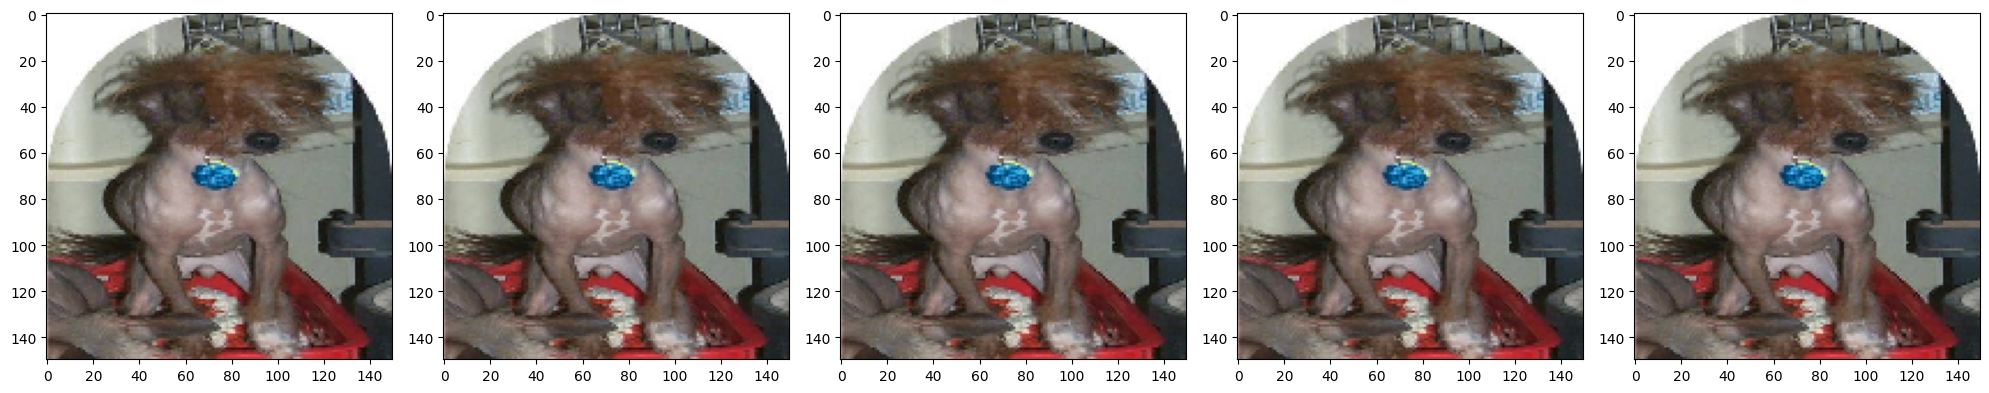

In [11]:
####Flipping the image horizontally

image_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen=image_gen.flow_from_directory(batch_size=Batch_size,
                              directory=train_dir,
                              shuffle=True,
                              target_size=(image_resize,image_resize))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)


Found 2000 images belonging to 2 classes.


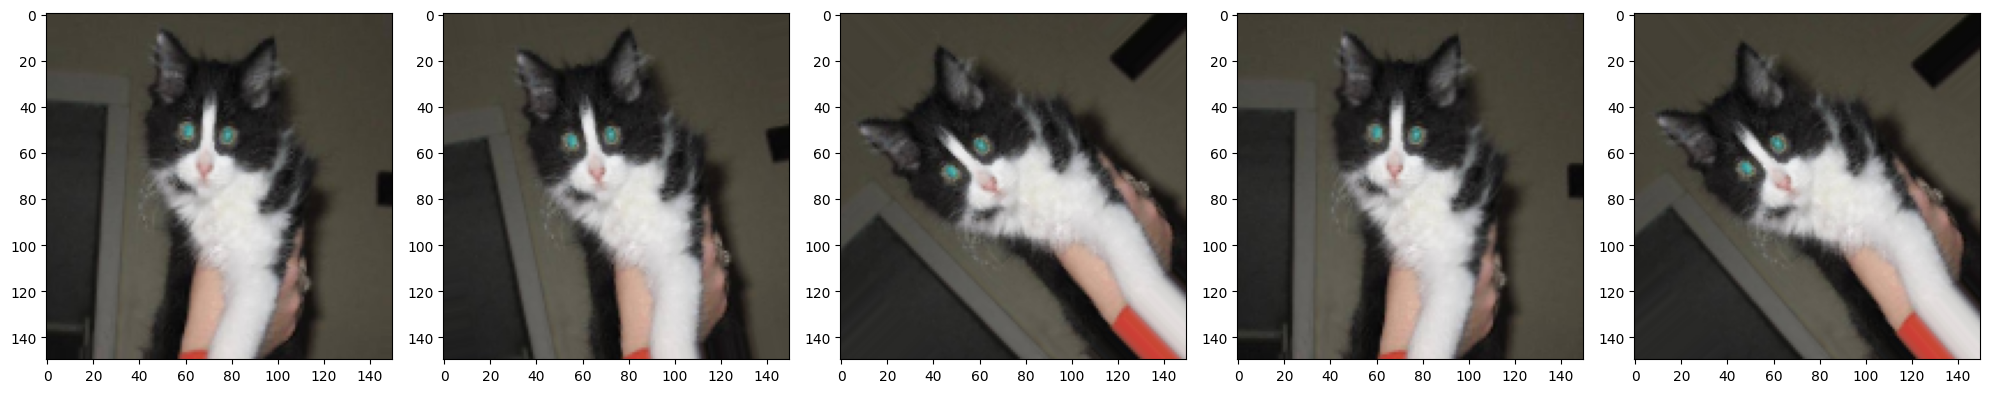

In [12]:
###rotating 45 degree
image_gen=ImageDataGenerator(rescale=1./255,rotation_range=45)
train_data_gen=image_gen.flow_from_directory(batch_size=Batch_size,
                              directory=train_dir,
                              shuffle=True,
                              target_size=(image_resize,image_resize))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

Found 2000 images belonging to 2 classes.


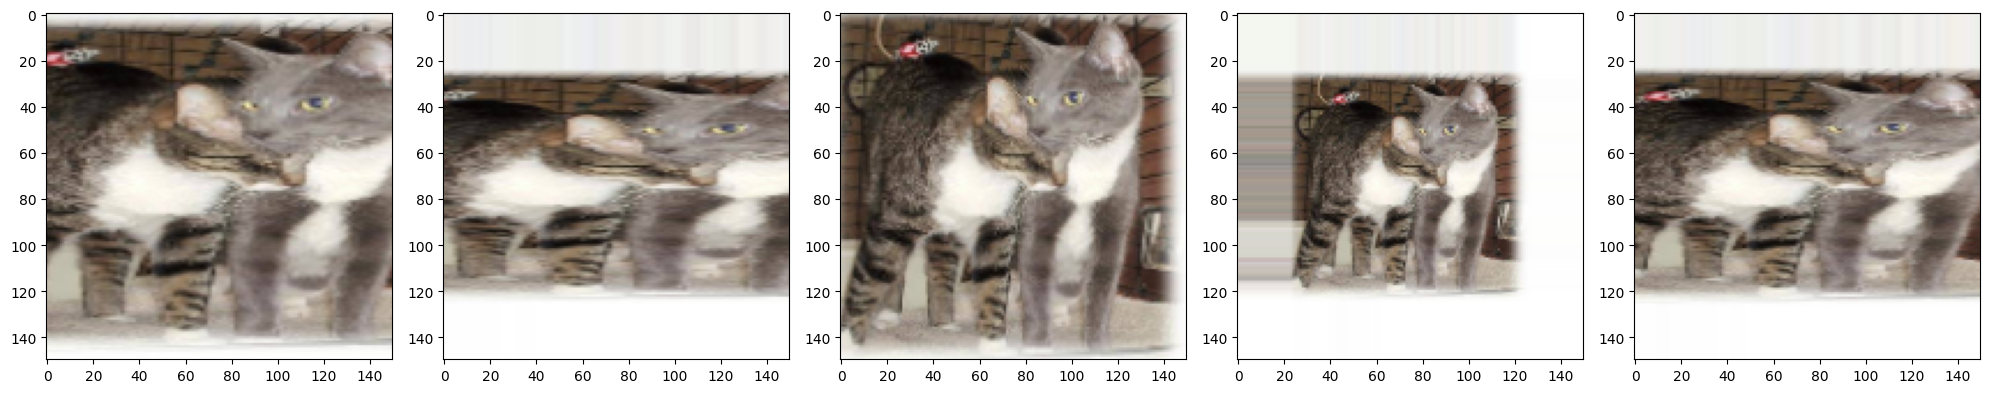

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=Batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(image_resize, image_resize))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

Found 2000 images belonging to 2 classes.


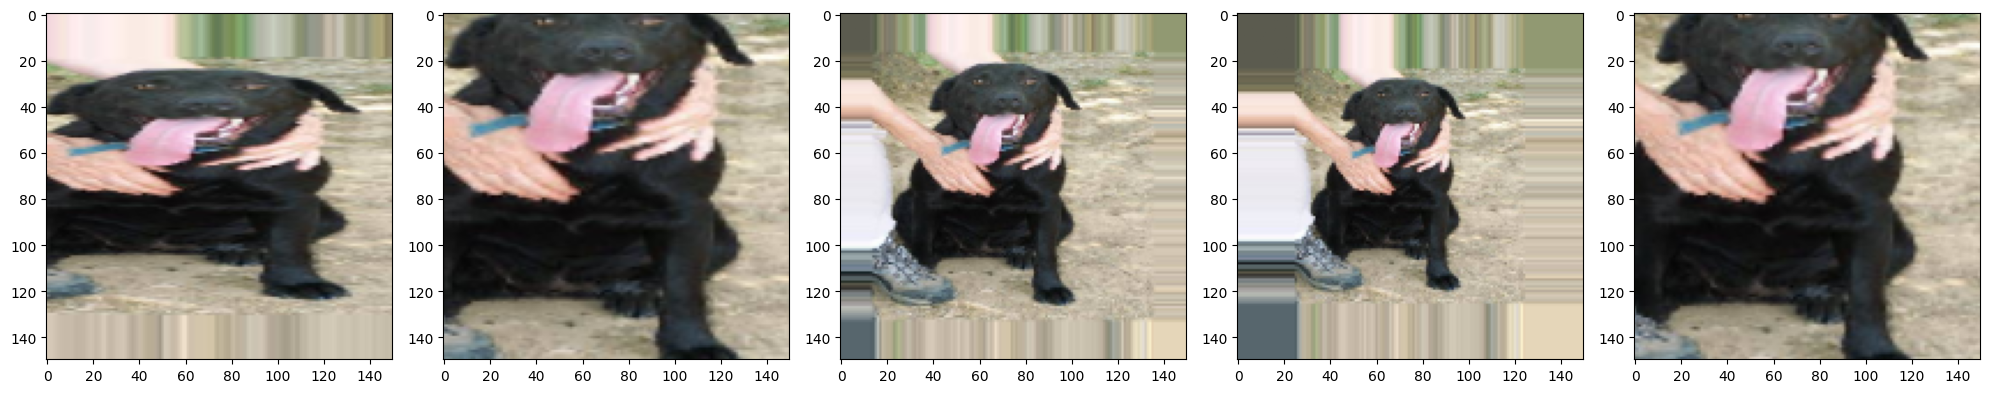

In [14]:
img_gen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen = image_gen.flow_from_directory(batch_size=Batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(image_resize, image_resize),
                                               class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

In [15]:
img_gen_val=ImageDataGenerator(rescale=1./255)
val_data_gen=img_gen_val.flow_from_directory(batch_size=Batch_size,
                                               directory=validation_dir,
                                               shuffle=True,
                                               target_size=(image_resize, image_resize),class_mode='binary')


Found 1000 images belonging to 2 classes.


In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
Epoches=80
historyy=model.fit(train_data_gen,epochs=Epoches,
                  steps_per_epoch=int(np.ceil(train_num/float(Batch_size))),
                  validation_data=val_data_gen,validation_steps=int(np.ceil(val_num/float(Batch_size))))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 812ms/step - accuracy: 0.5155 - loss: 0.7360 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 720ms/step - accuracy: 0.5419 - loss: 0.6887 - val_accuracy: 0.5780 - val_loss: 0.6760
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 722ms/step - accuracy: 0.5389 - loss: 0.6872 - val_accuracy: 0.6450 - val_loss: 0.6455
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 703ms/step - accuracy: 0.6212 - loss: 0.6540 - val_accuracy: 0.6340 - val_loss: 0.6312
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 702ms/step - accuracy: 0.6530 - loss: 0.6298 - val_accuracy: 0.6700 - val_loss: 0.6061
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 710ms/step - accuracy: 0.6592 - loss: 0.6159 - val_accuracy: 0.6610 - val_loss: 0.5995
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 708ms/step - accuracy: 0.7024 - loss: 0.5739 - val_accuracy: 0.6890 - val_loss: 0.5765
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.6715 - loss: 0.5773 - val_accuracy: 0.702

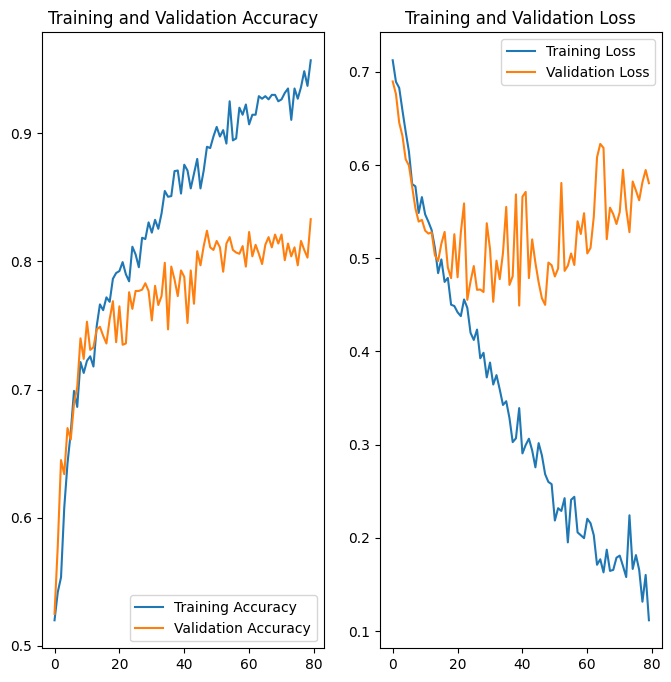

In [19]:
acc = historyy.history['accuracy']
val_acc = historyy.history['val_accuracy']

loss = historyy.history['loss']
val_loss = historyy.history['val_loss']

epochs_range = range(Epoches)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save("model.h5")
from tensorflow.keras.models import load_model

model = load_model("model.h5")

In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,636 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


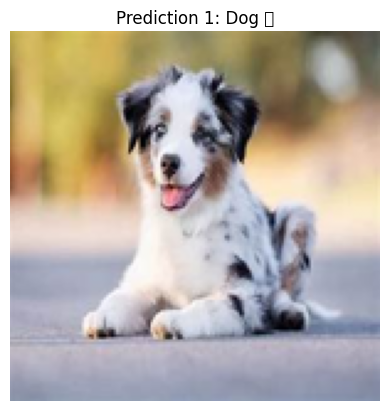

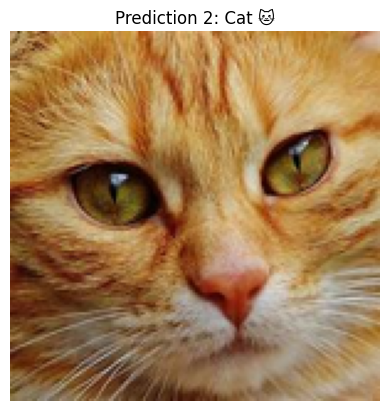

In [31]:
img = Image.open("/content/OIP (1).jpeg")
img1 = Image.open("/content/OIP (2).jpeg")

# تعديل الصورة عشان تبقى شبه الصور اللي اتدرب عليها النموذج
img = img.resize((150, 150))  # نفس حجم target_size اللي استخدمته في التدريب
img_array = np.array(img) / 255.0  # لازم نعمل نفس الrescale اللي كنت عامله في ImageDataGenerator
img_array = img_array.reshape((1, 150, 150, 3))  # إضافة البُعد الرابع

img1 = img1.resize((150, 150))  # نفس حجم target_size اللي استخدمته في التدريب
img1_array = np.array(img1) / 255.0  # لازم نعمل نفس الrescale اللي كنت عامله في ImageDataGenerator
img1_array = img1_array.reshape((1, 150, 150, 3))  # إضافة البُعد الرابع
prediction = model.predict(img_array)
plt.figure()
plt.imshow(img_array[0])
plt.title("Prediction 1: " + ("Dog 🐶" if prediction[0][0] < 0.5 else "Cat 🐱"))
plt.axis("off")

prediction = model.predict(img1_array)
plt.figure()
plt.imshow(img1_array[0])
plt.title("Prediction 2: " + ("Dog 🐶" if prediction[0][0] < 0.5 else "Cat 🐱"))
plt.axis("off")
plt.show()
